In [9]:
import numpy as np

import matplotlib.pyplot as plt 

In [13]:
# Binomial option pricing model function
def binomial_option_price(S0, K, T, r, sigma, n):
    delta_t = T / n
    u = np.exp(sigma * np.sqrt(delta_t))
    d = 1 / u
    p = (np.exp(r * delta_t) - d) / (u - d)
    option_prices = []

    for i in range(n + 1):
        S = S0 * (u ** (n - i)) * (d ** i)
        option_prices.append(max(S - K, 0))

    for _ in range(n):
        option_prices = [np.exp(-r * delta_t) * (p * option_prices[j] + (1 - p) * option_prices[j + 1]) for j in range(len(option_prices) - 1)]

    return option_prices[0]

In [14]:
# Define option parameters
S0 = 100         # Current stock price
K = 105          # Strike price
T = 1.0          # Time to expiration (in years)
r = 0.05         # Risk-free interest rate
sigma = 0.2      # Volatility (annualized)

In [15]:
# Create an array of different numbers of time steps
n_steps = np.arange(1, 101)  # Vary from 1 to 100

In [16]:
# Calculate option prices for different numbers of time steps
option_prices = [binomial_option_price(S0, K, T, r, sigma, n) for n in n_steps]

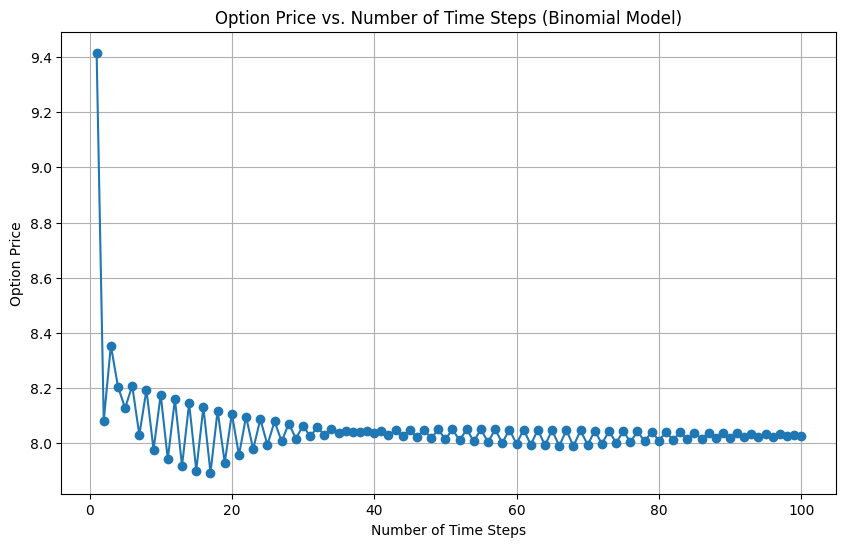

In [17]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(n_steps, option_prices, marker='o', linestyle='-')
plt.xlabel("Number of Time Steps")
plt.ylabel("Option Price")
plt.title("Option Price vs. Number of Time Steps (Binomial Model)")
plt.grid(True)

# Show the plot
plt.show()